# Abalone Analysis

&nbsp;

<i><b>Specimen Growth Analytics<b><i>

&nbsp;

According to [Wikipedia](https://en.wikipedia.org/wiki/Abalone), "Abalone is a common name for any of a group of small to very large sea snails, marine gastropod molluscs in the family Haliotidae."  To put it simply, we are taking about a shell-fish that is found in the wild and served in restaurants.

&nbsp;

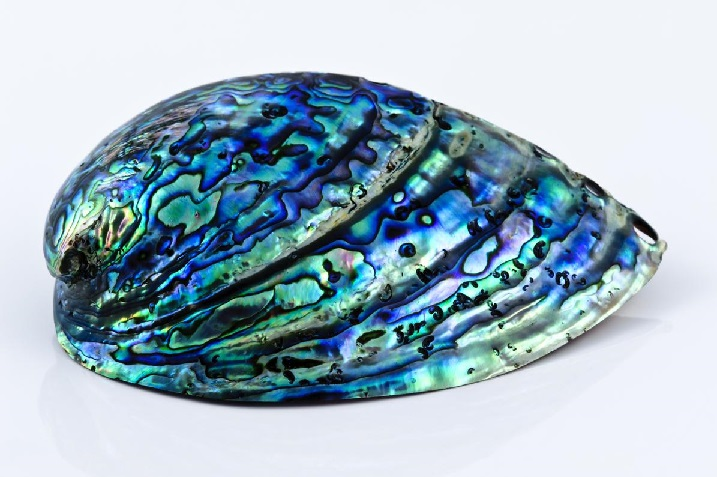

&nbsp;

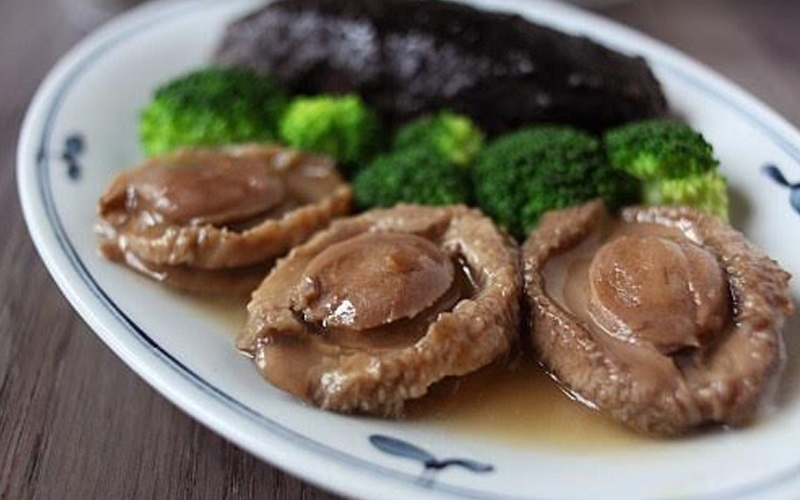

This [article](https://www.ocregister.com/2016/05/29/white-abalone-were-nearly-eaten-out-of-existence-in-the-1970s-now-a-breeding-program-aims-to-revive-them/) in the Orange County Register, a California-based publication, explains the history of this mollusk as a target of over-fishing, threatened with extinction.  Abalone are tasty but perhaps too tasty for their own good.  Sadly, they go well with broccoli.

&nbsp;

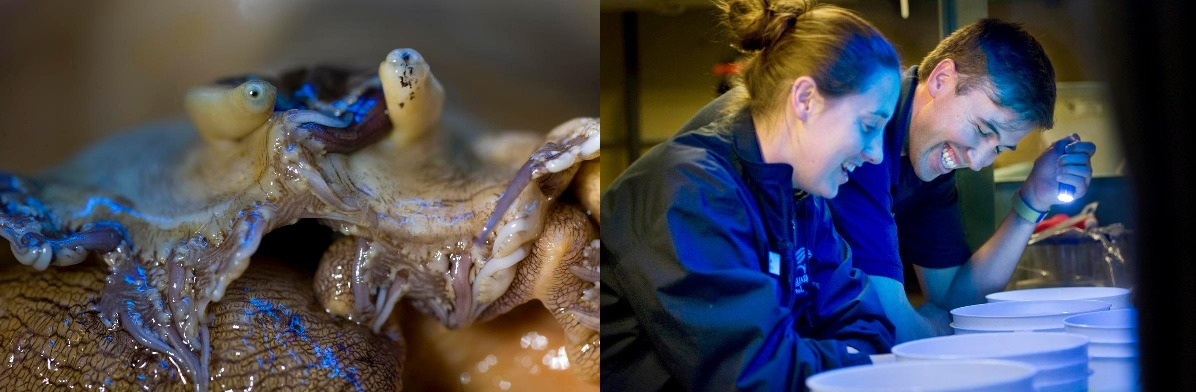

&nbsp;

These concerns have spured on the Aquarium of the Pacific in Longbeach, California to breed and study these delightful creatures and enhance our understanding of how they live in the wild.  Ever consider them as pets?

The purpose of this Jupyter Notebook is to aid in these scientific efforts by analyzing growth patterns.  Age in years is calculated by adding 1.5 to the number of growth rings according to the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/abalone).  Ring count can be determined under a microscope but why not try to predict it using data?  The data to be considered involves various measurements in grams and millimeters along with gender.

Special thanks to the aforemented data repository at UCI for this dataset and to the Orange County Register (linked to above) from which visuals were borrowed.

&nbsp;

&nbsp;

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import rcParams
sns.set(style="darkgrid")
#plt.style.use('fivethirtyeight')
plt.style.use('classic')
#plt.style.use('dark_background')
#plt.style.use('ggplot')
#plt.style.use('grayscale')

In [2]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [3]:
data = pd.read_csv('abalone.data', header = None)

In [4]:
data.columns = ['Sex (M, F, and I-infant)', 'Length of Shell-mm (longest)',
                'Diameter-mm (perpendicular to longest)', 'Height-mm (shell with meat)',
                'Whole-g (entire specimen)', 'Shucked-g (meat)',
                'Viscera-g (gut after bleeding)', 'Shell-g (dry)',
                'Rings Count']

In [5]:
data.columns

Index(['Sex (M, F, and I-infant)', 'Length of Shell-mm (longest)',
       'Diameter-mm (perpendicular to longest)', 'Height-mm (shell with meat)',
       'Whole-g (entire specimen)', 'Shucked-g (meat)',
       'Viscera-g (gut after bleeding)', 'Shell-g (dry)', 'Rings Count'],
      dtype='object')

In [15]:
data.head().style.hide_index()

"Sex (M, F, and I-infant)",Length of Shell-mm (longest),Diameter-mm (perpendicular to longest),Height-mm (shell with meat),Whole-g (entire specimen),Shucked-g (meat),Viscera-g (gut after bleeding),Shell-g (dry),Rings Count
M,0.455000,0.365000,0.095000,0.514000,0.224500,0.101000,0.150000,15
M,0.350000,0.265000,0.090000,0.225500,0.099500,0.048500,0.070000,7
F,0.530000,0.420000,0.135000,0.677000,0.256500,0.141500,0.210000,9
M,0.440000,0.365000,0.125000,0.516000,0.215500,0.114000,0.155000,10
I,0.330000,0.255000,0.080000,0.205000,0.089500,0.039500,0.055000,7


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Sex (M, F, and I-infant)                4177 non-null   object 
 1   Length of Shell-mm (longest)            4177 non-null   float64
 2   Diameter-mm (perpendicular to longest)  4177 non-null   float64
 3   Height-mm (shell with meat)             4177 non-null   float64
 4   Whole-g (entire specimen)               4177 non-null   float64
 5   Shucked-g (meat)                        4177 non-null   float64
 6   Viscera-g (gut after bleeding)          4177 non-null   float64
 7   Shell-g (dry)                           4177 non-null   float64
 8   Rings Count                             4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [8]:
data.iloc[:,0].unique()

array(['M', 'F', 'I'], dtype=object)

In [9]:
data.isnull().sum()

Sex (M, F, and I-infant)                  0
Length of Shell-mm (longest)              0
Diameter-mm (perpendicular to longest)    0
Height-mm (shell with meat)               0
Whole-g (entire specimen)                 0
Shucked-g (meat)                          0
Viscera-g (gut after bleeding)            0
Shell-g (dry)                             0
Rings Count                               0
dtype: int64

&nbsp;

Age in years is determined by adding 1.5 to the rings count.  So let's look at the connection between that number and the specimen being designated as an infant rather than male or female.

&nbsp;

In [10]:
sex = 'Sex (M, F, and I-infant)'

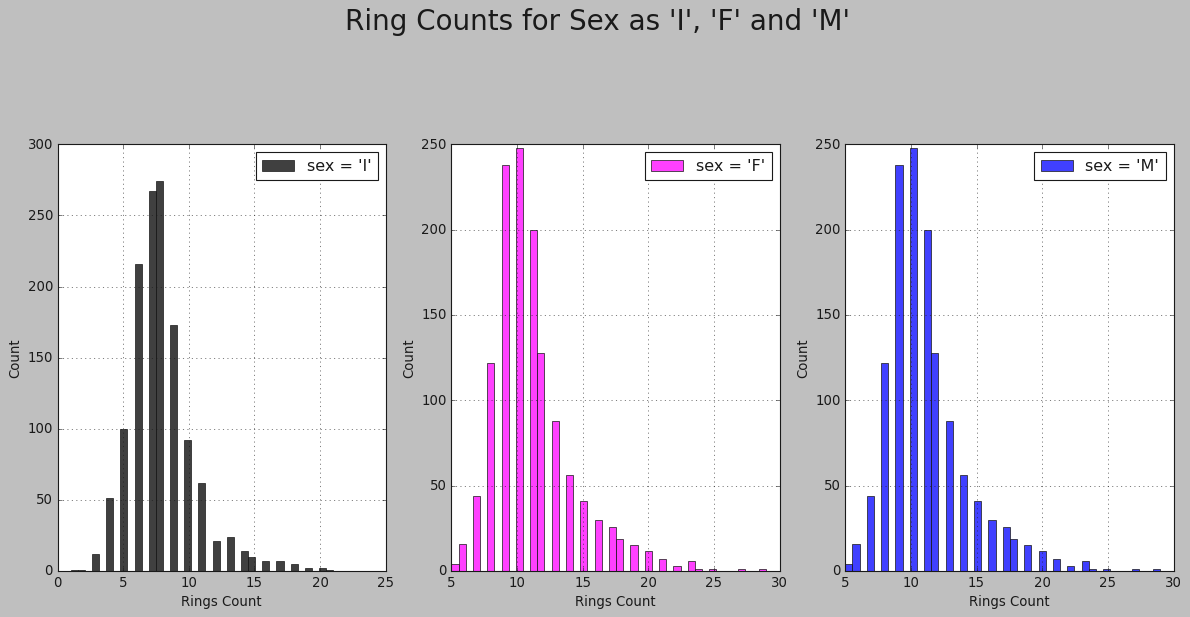

In [11]:
fig = plt.figure(figsize=(18, 8))
fig.suptitle("Ring Counts for Sex as 'I', 'F' and 'M'", fontsize=25)
fig.subplots_adjust(hspace=-0.8)

fig.add_subplot(2,3,4)
sns.histplot(data[data[sex]=='I']['Rings Count'], color='black', label="sex = 'I'")
plt.legend()
plt.grid()
fig.add_subplot(2,3,5)
sns.histplot(data[data[sex]=='F']['Rings Count'], color='magenta', label="sex = 'F'")
plt.legend()
plt.grid()
fig.add_subplot(2,3,6)
sns.histplot(data[data[sex]=='F']['Rings Count'], color='blue', label="sex = 'M'")
plt.legend()
plt.grid()

plt.show()

&nbsp;

Ring counts bare little or no relationship to the specimen being tabulated as 'I' (for infant), so let's use 'neutral' in its place.  Also, making the sex a categorical variable is desirable.

&nbsp;

In [12]:
data.loc[data[sex]=='I', sex] = 'neutral'

In [13]:
data.iloc[:,0] = pd.Categorical(data.iloc[:,0])

In [14]:
data.rename(columns = {sex:'Sex (M, F, and neutral)'}, inplace = True) 

In [15]:
sex = 'Sex (M, F, and neutral)'

In [16]:
data.columns

Index(['Sex (M, F, and neutral)', 'Length of Shell-mm (longest)',
       'Diameter-mm (perpendicular to longest)', 'Height-mm (shell with meat)',
       'Whole-g (entire specimen)', 'Shucked-g (meat)',
       'Viscera-g (gut after bleeding)', 'Shell-g (dry)', 'Rings Count'],
      dtype='object')

In [17]:
data[sex].unique()

['M', 'F', 'neutral']
Categories (3, object): ['M', 'F', 'neutral']

<br>
<br>
<br>

Sanity checks for this dataframe should look at:

1) The ratio of each measurement to the rings count.<br>
2) Measurements in 'mm' taken as a group.<br>
3) Measurements in 'g' taken as a group.<br>

In the latter two, certain numerical relationships should arise from a simple reading of column labels.

&nbsp;

To establish a general growth profile, let's divide each measurement by it's corresponding ring count, generate an array of histograms and plot the result.
<br>
<br>
<br>
<br>

In [18]:
lengthR   =  data.iloc[:,1]/data['Rings Count']
diameterR =  data.iloc[:,2]/data['Rings Count']
heightR   =  data.iloc[:,3]/data['Rings Count']
wholeR    =  data.iloc[:,4]/data['Rings Count']
shuckedR  =  data.iloc[:,5]/data['Rings Count']
visceraR  =  data.iloc[:,6]/data['Rings Count']
shellR    =  data.iloc[:,7]/data['Rings Count']

In [19]:
ratiosDF = pd.DataFrame()
ratiosDF['lengthR']   =  lengthR
ratiosDF['diameterR'] =  diameterR
ratiosDF['heightR']   =  heightR
ratiosDF['wholeR']    =  wholeR
ratiosDF['shuckedR']  =  shuckedR
ratiosDF['visceraR']  =  visceraR
ratiosDF['shellR']    =  shellR
ratiosDF['rings count'] = data['Rings Count']
ratiosDF.head()

,lengthR,diameterR,heightR,wholeR,shuckedR,visceraR,shellR,rings count
0,0.030333,0.024333,0.006333,0.034267,0.014967,0.006733,0.010000,15
1,0.050000,0.037857,0.012857,0.032214,0.014214,0.006929,0.010000,7
2,0.058889,0.046667,0.015000,0.075222,0.028500,0.015722,0.023333,9
3,0.044000,0.036500,0.012500,0.051600,0.021550,0.011400,0.015500,10
4,0.047143,0.036429,0.011429,0.029286,0.012786,0.005643,0.007857,7


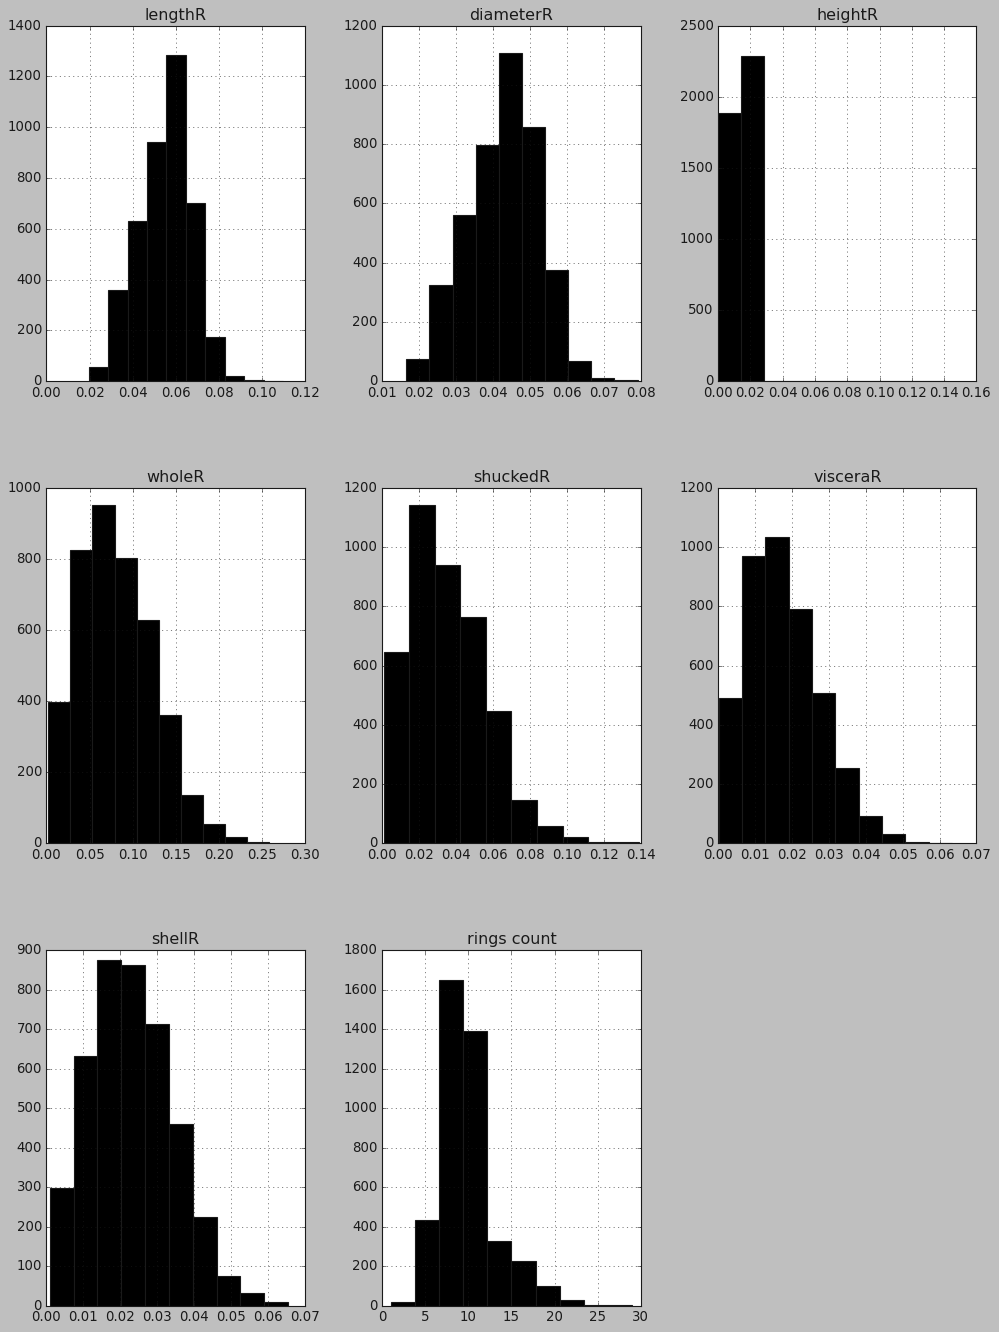

In [20]:
ratiosDF.hist(bins = 10, figsize = (15,20), color = 'black')
plt.show()

<br>
<br>

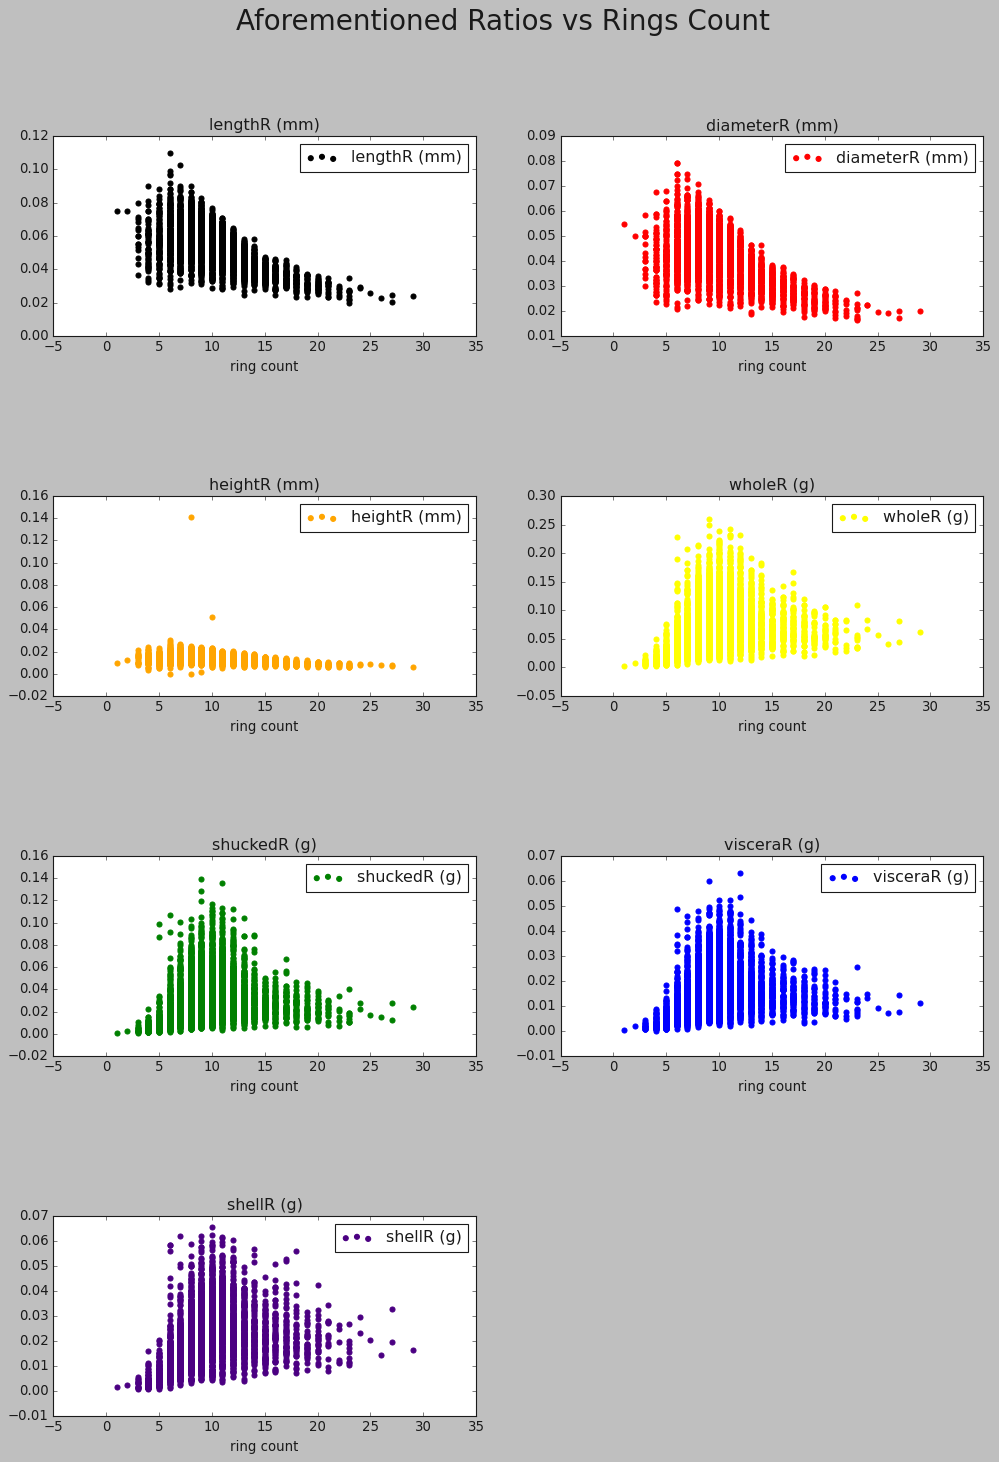

In [21]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(15,20))
fig.suptitle('Aforementioned Ratios vs Rings Count', fontsize=25)
fig.subplots_adjust(hspace=0.8)
axis[3, 1].axis('off')

labels_list = ['lengthR (mm)', 'diameterR (mm)', 'heightR (mm)', 'wholeR (g)', 'shuckedR (g)', 'visceraR (g)', \
               'shellR (g)']
colors_list = ['black', 'red', 'orange', 'yellow', 'green', 'blue', 'indigo']
iterator = 0
i = 0
j = 0
for value in ratiosDF.columns[:-1]:
    axis[i,j].set_title(labels_list[iterator])
    axis[i,j].set_xlabel("ring count")
    plt.sca(axis[i][j])
    plt.scatter(ratiosDF['rings count'], ratiosDF[value], color = colors_list[iterator], label = labels_list[iterator])
    plt.legend()
    
    iterator += 1
    j = iterator%2
    i = iterator//2
    
for i in range(4):
    print()

&nbsp;

These plots show a plausible narrative that the growth of the organism in net measurements starts out slow, accelerates and then tails off.  The possiblility still remains for bad data, especially in the height category.  There may be sanity check problems in other columns.

&nbsp;

Let's give short hand variable names for the measurements in 'Data':

&nbsp;

In [22]:
data.head(0)

,"Sex (M, F, and neutral)",Length of Shell-mm (longest),Diameter-mm (perpendicular to longest),Height-mm (shell with meat),Whole-g (entire specimen),Shucked-g (meat),Viscera-g (gut after bleeding),Shell-g (dry),Rings Count


In [23]:
length   = 'Length of Shell-mm (longest)'
diameter = 'Diameter-mm (perpendicular to longest)'
height   = 'Height-mm (shell with meat)'
whole    = 'Whole-g (entire specimen)'
shucked  = 'Shucked-g (meat)'
viscera  = 'Viscera-g (gut after bleeding)'
shell    = 'Shell-g (dry)'

&nbsp;

And now for a sanity check to see how the maximum specimen length grouped with ring count changes with ring count:

&nbsp;

In [24]:
data.groupby('Rings Count')[[length]].max()

,Length of Shell-mm (longest)
Rings Count,
1,0.075
2,0.150
3,0.240
4,0.360
5,0.440
6,0.660
7,0.720
8,0.720
9,0.745


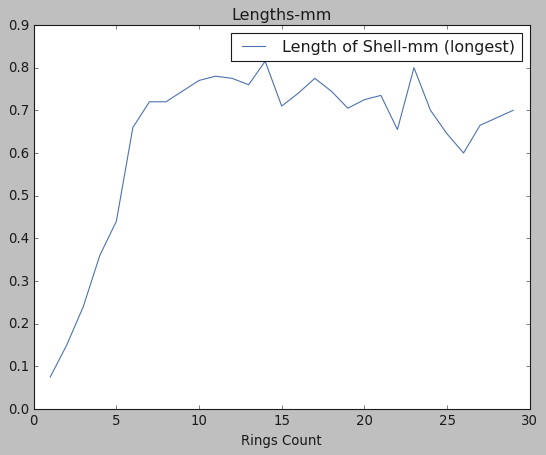

In [25]:
data.groupby('Rings Count')[[length]].max().plot(title = 'Lengths-mm')
plt.show()

&nbsp;

This looks plausible with the length increasing rapidly with rings count for younger specimens and then leveling off into random static due to individual differences.  Now to plot all of the meaured columns for maximums and minimums grouped by rings count:

&nbsp;

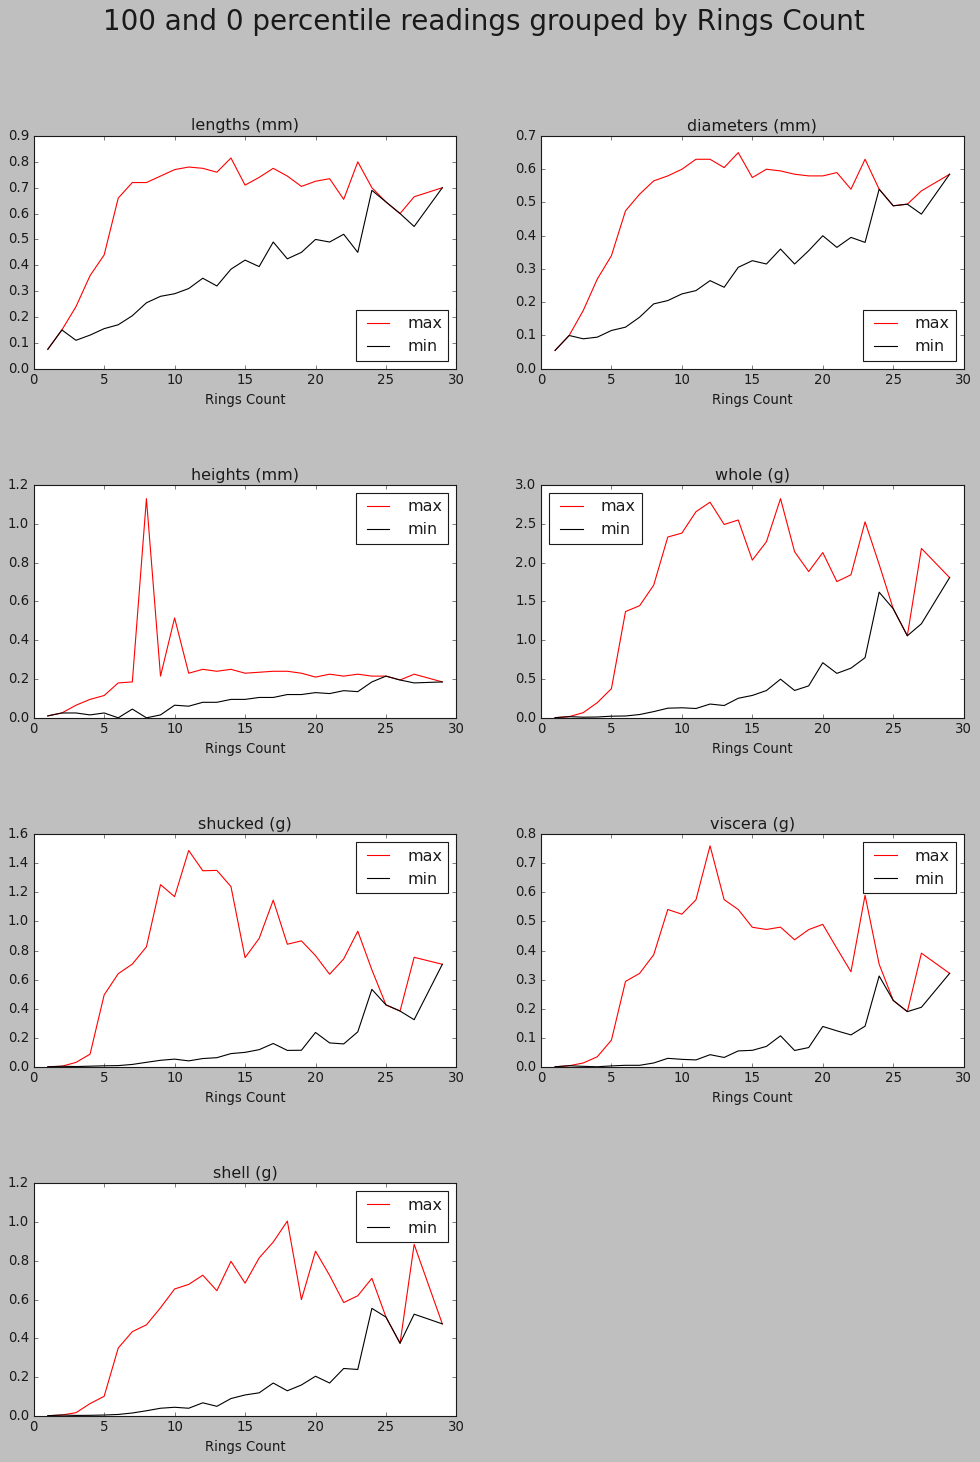

In [26]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(15,20))
fig.suptitle('100 and 0 percentile readings grouped by Rings Count', fontsize=25)
fig.subplots_adjust(hspace=0.5)
axis[3, 1].axis('off')

labels_list = ['lengths (mm)', 'diameters (mm)', 'heights (mm)', 'whole (g)', 'shucked (g)', 'viscera (g)', 'shell (g)']
iterator = 0
i = 0
j = 0
for value in data.columns[1:8]:
    data.rename(columns = {value:'max'}, inplace = True)
    data.groupby('Rings Count')[['max']].max().plot(title = labels_list[iterator], ax = axis[i][j], color = 'red')
    data.rename(columns = {'max':'min'}, inplace = True) 
    data.groupby('Rings Count')[['min']].min().plot(ax = axis[i][j], color = 'black')
    data.rename(columns = {'min':value}, inplace = True)
    
    iterator += 1
    j = iterator%2
    i = iterator//2
    
for i in range(4):
    print()

&nbsp;

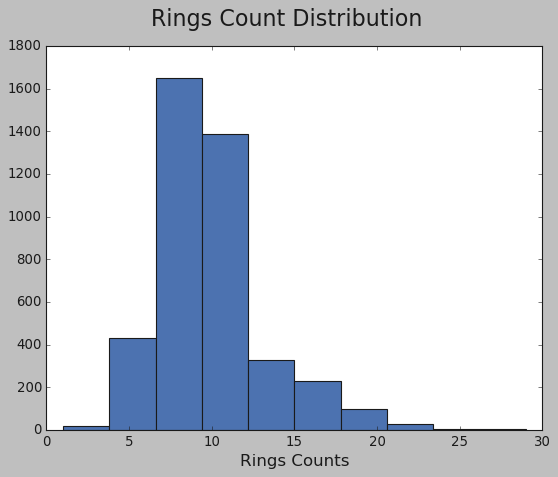

In [27]:
fig, axis = plt.subplots(1, figsize=(8,6))
fig.suptitle('Rings Count Distribution', fontsize=20)
axis.hist(data['Rings Count'], bins =10)
axis.set_xlabel("Rings Counts", fontsize=15)
plt.show()

This histogram shows the sample size of the ring count declining predictably at the high end where the min and max measured values get closer together.

Now let's look at the height anomalies.

&nbsp;

In [28]:
pd.DataFrame(data[height]).sort_values(by = height, ascending=False).head(10)

,Height-mm (shell with meat)
2051,1.130
1417,0.515
1763,0.250
1428,0.250
2179,0.250
307,0.240
1528,0.240
277,0.240
2161,0.240
3993,0.235


The top two heights are implausible.  The best way to handle this is to get the ring count for both and accordingly substitute both corresponding average heights.

In [29]:
data.loc[data['Rings Count'] == data.iloc[[1417],:]['Rings Count'].values[0] , :][height].mean()

0.15409305993690883

In [30]:
data.loc[data.index == 1417, height] = 0.15409305993690883

In [31]:
data.loc[data.index == 1417, height].values[0]

0.15409305993690883

In [32]:
data.loc[data['Rings Count'] == data.iloc[[2051],:]['Rings Count'].values[0] , :][height].mean()

0.12855633802816907

In [33]:
data.loc[data.index == 2051, height] = 0.12855633802816907

In [34]:
data.loc[data.index == 2051, height].values[0]

0.12855633802816907

In [35]:
pd.DataFrame(data[height]).sort_values(by = height, ascending=False).head(10)

,Height-mm (shell with meat)
2179,0.250
1428,0.250
1763,0.250
2161,0.240
307,0.240
277,0.240
1528,0.240
2177,0.235
506,0.235
3993,0.235


&nbsp;

Redoing the plot for height:

&nbsp;

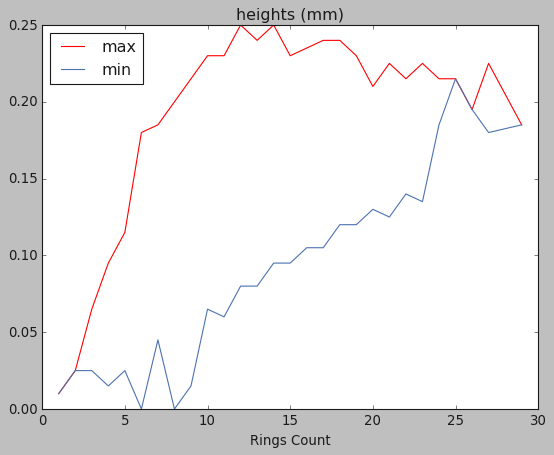

In [36]:
fig, axis = plt.subplots(1, figsize=(8,6))
data.rename(columns = {height:'max'}, inplace = True) 
data.groupby('Rings Count')[['max']].max().plot(title = 'heights (mm)', ax = axis, color = 'red')
data.rename(columns = {'max':'min'}, inplace = True) 
data.groupby('Rings Count')[['min']].min().plot(ax = axis)
data.rename(columns = {'min':height}, inplace = True)

&nbsp;

Now for the plausibility checks for measurements in mm.

&nbsp;

In [37]:
data.shape

(4177, 9)

In [38]:
data[data[length] > data[diameter]].shape

(4176, 9)

In [39]:
data[data[diameter] >= data[length]]

,"Sex (M, F, and neutral)",Length of Shell-mm (longest),Diameter-mm (perpendicular to longest),Height-mm (shell with meat),Whole-g (entire specimen),Shucked-g (meat),Viscera-g (gut after bleeding),Shell-g (dry),Rings Count
1210,neutral,0.185,0.375,0.12,0.4645,0.196,0.1045,0.15,6


&nbsp;

The diameter and length appear to be inverted.  Between these two measures, we will replace the one further from the average for the ring count of that sample.

&nbsp;

In [40]:
presumed_diameter=data.loc[data['Rings Count']==data.loc[data.index == 1210, 'Rings Count'].values[0] , :][diameter].mean()

In [41]:
presumed_diameter/0.375

0.7436293436293439

In [42]:
presumed_length=data.loc[data['Rings Count'] == data.loc[data.index == 1210, 'Rings Count'].values[0] , :][length].mean()

In [43]:
presumed_length/0.185

1.996556401961808

Replacing the length:

In [44]:
data.loc[data.index == 1210, length] = presumed_length

In [45]:
data.loc[data.index == 1210, length].values[0]

0.3693629343629345

In [46]:
data[data[diameter] > data[height]].shape

(4177, 9)

In [47]:
data[data[height]==0]

,"Sex (M, F, and neutral)",Length of Shell-mm (longest),Diameter-mm (perpendicular to longest),Height-mm (shell with meat),Whole-g (entire specimen),Shucked-g (meat),Viscera-g (gut after bleeding),Shell-g (dry),Rings Count
1257,neutral,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,neutral,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [48]:
data[length].describe()

count    4177.000000
mean        0.524036
std         0.120002
min         0.075000
25%         0.450000
50%         0.545000
75%         0.615000
max         0.815000
Name: Length of Shell-mm (longest), dtype: float64

In [49]:
data[diameter].quantile(0.06)

0.23

Samples 1257 and 3996 have 0 height even though a small but significant percentage (6%) of all samples are smaller in diameter.  Changing the height for both:

In [50]:
data.loc[data['Rings Count'] == 8][height].mean()

0.12679323298948625

In [51]:
data.loc[data.index == 1257, height] = 0.12679323298948625

In [52]:
data.loc[data.index == 1257, height].values[0]

0.12679323298948625

In [53]:
data.loc[data['Rings Count'] == 6][height].mean()

0.09177606177606175

In [54]:
data.loc[data.index == 3996, height] = 0.09177606177606175

In [55]:
data.loc[data.index == 3996, height].values[0]

0.09177606177606175

In [56]:
data[data[height]==0].shape

(0, 9)

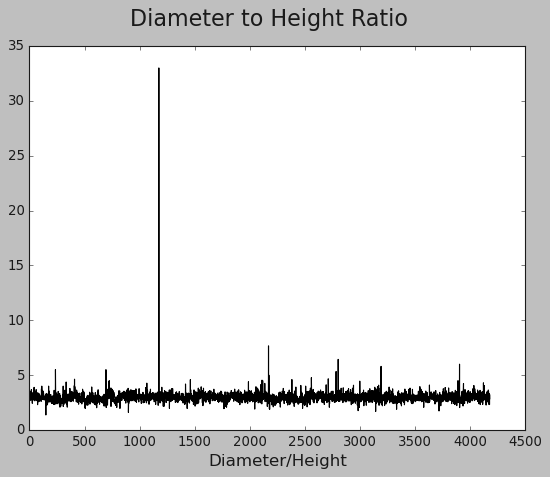

In [57]:
fig, axis = plt.subplots(1, figsize=(8,6))
fig.suptitle('Diameter to Height Ratio', fontsize=20)
axis.plot(data[diameter]/data[height], color = 'black')
axis.set_xlabel("Diameter/Height", fontsize=15)
plt.show()

In [58]:
(data[diameter]/data[height]).sort_values(ascending=False).head(10)

1174    33.000000
2169     7.666667
2801     6.437500
3902     6.000000
3190     5.800000
694      5.500000
236      5.500000
2782     5.333333
2172     5.000000
2558     4.769231
dtype: float64

Let's look more closely at sample 1174:

In [59]:
data.iloc[[1174]][[diameter, height, 'Rings Count']]

,Diameter-mm (perpendicular to longest),Height-mm (shell with meat),Rings Count
1174,0.495,0.015,9


In [60]:
data[data['Rings Count'] == 9][height].mean()

0.14272133526850514

In [61]:
data[data['Rings Count'] == 9][diameter].mean()

0.4252177068214804

Changing the height:

In [62]:
data.loc[data.index == 1174, height] = 0.14272133526850514

In [63]:
data.loc[data.index == 1174, height].values[0]

0.14272133526850514

In [64]:
(data[diameter]/data[height]).sort_values(ascending=False).head(10)

2169    7.666667
2801    6.437500
3902    6.000000
3190    5.800000
694     5.500000
236     5.500000
2782    5.333333
2172    5.000000
2558    4.769231
2711    4.666667
dtype: float64

&nbsp;

Now to check the weights:

&nbsp;

In [65]:
data.head(1).T

,0
"Sex (M, F, and neutral)",M
Length of Shell-mm (longest),0.455
Diameter-mm (perpendicular to longest),0.365
Height-mm (shell with meat),0.095
Whole-g (entire specimen),0.514
Shucked-g (meat),0.2245
Viscera-g (gut after bleeding),0.101
Shell-g (dry),0.15
Rings Count,15


&nbsp;

Let's compare the whole weight with the sum of the other weight measurements.

&nbsp;

In [66]:
((data[shucked] +  data[viscera] + data[shell])/data[whole]).sort_values(ascending=False).head(20)

2627    5.170616
1216    4.644550
3996    3.257463
2641    3.140684
2127    2.062992
3086    2.009804
3814    1.503093
236     1.500000
822     1.490909
1264    1.466398
2114    1.428571
2171    1.372881
193     1.372727
1430    1.349515
3518    1.331973
1219    1.284173
2790    1.277037
2084    1.269062
43      1.250000
1302    1.248049
dtype: float64

In [67]:
((data[shucked] +  data[viscera] + data[shell])/data[whole]).sort_values().head(20)

647     0.664093
1812    0.665421
3860    0.685305
2172    0.688312
831     0.697236
4052    0.698124
999     0.699822
1056    0.724138
270     0.724564
2240    0.729381
811     0.733723
3827    0.734081
694     0.736842
3800    0.744645
3837    0.750000
3143    0.750000
3396    0.755879
2528    0.761541
3522    0.763359
760     0.765619
dtype: float64

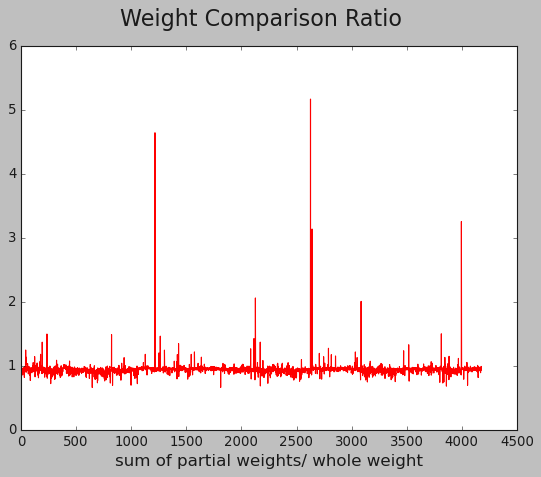

In [68]:
fig, axis = plt.subplots(1, figsize=(8,6))
fig.suptitle('Weight Comparison Ratio', fontsize=20)
axis.plot((data[shucked] +  data[viscera] + data[shell])/data[whole], color='red')
axis.set_xlabel("sum of partial weights/ whole weight", fontsize=15)
plt.show()

&nbsp;

How can the entire specimen be up to five times lighter than the sum of its components?  Or 25% heavier?

&nbsp;

In [69]:
(((data[shucked] +  data[viscera] + data[shell])/data[whole]) > 1).sum()

155

In [70]:
(((data[shucked] +  data[viscera] + data[shell])/data[whole]) < 0.80).sum()

43

In [71]:
data.shape

(4177, 9)

&nbsp;

These problems must be related to changes in moisture content at various times during the processing of the sample.  Rather than discarding a majority of the data because of unreliable weight measurements, it would be better to consider length measurements for devising predictive models.

With this in mind, let's drop rows where the weight ratio is higher than 2.0, forming spikes in the above-shown histogram.

&nbsp;

In [72]:
data.drop(data[(data[shucked] +  data[viscera] + data[shell])/data[whole] > 2.0].index, inplace=True)

Revisiting the histogram:

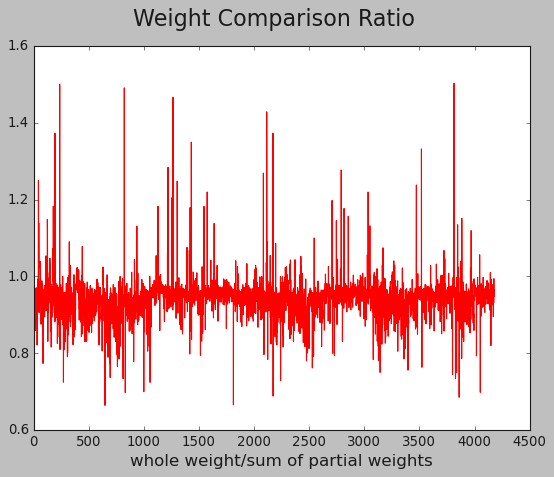

In [73]:
fig, axis = plt.subplots(1, figsize=(8,6))
fig.suptitle('Weight Comparison Ratio', fontsize=20)
axis.plot((data[shucked] +  data[viscera] + data[shell])/data[whole], color='red')
axis.set_xlabel("whole weight/sum of partial weights", fontsize=15)
plt.show()

&nbsp;

At this point, we are going to settle some questions regarding the designations, 'M', 'F' and 'neutral' as they relate to rings count.  Do they matter at all?  As a preliminary analysis, let's make a table of means grouped by sex for each measurement in either millimeters or grams.

&nbsp;

In [74]:
means = np.array([])
for outer_value in data.columns[1:8]:
    for inner_value in data[sex].unique():
        means = np.append (means, np.mean(data[data[sex] == inner_value][outer_value]))
means = np.reshape(means, [7, 3])
pd.concat([pd.DataFrame({'measurements' : data.columns[1:8]}), pd.DataFrame(means, columns = np.array(data[sex].\
                        unique()))], axis=1).set_index(['measurements'] + data[sex].unique().tolist())

,,,
measurements,M,F,neutral
Length of Shell-mm (longest),0.561391,0.579093,0.428211
Diameter-mm (perpendicular to longest),0.439287,0.454732,0.326759
Height-mm (shell with meat),0.151145,0.157342,0.108265
Whole-g (entire specimen),0.991459,1.046532,0.432695
Shucked-g (meat),0.432946,0.446188,0.190695
Viscera-g (gut after bleeding),0.215545,0.230689,0.092223
Shell-g (dry),0.281969,0.302010,0.128242


&nbsp;

For each row, the column in the middle has the largest number and the column on the right has the smallest.  But to attach a p value to the claim that these designations have something to say, do the following:

1) Compile another table with the same dimmensions as the one above.  This time each entry is a Pearson Coefficient for a measured value against the ring count.

2) Compare entries on the same row, two at a time, each entry representing a specific dataset.  For each such comparison, subtract one of the two entries from the other.

3) Grouping by ring count, combine the two datasets in '2)' into one dataset.

4) Use np.random.permutation() to scramble up this dataset 10,000 times to see how often the difference calculated in '2)' is equaled or exceeded.  The number of times that this happens devided by 10,000 is the p-value.

In [75]:
pearson_array = np.array([])
for outer_value in data.columns[1:8]:
    for inner_value in data[sex].unique():
        pearson_array = np.append (pearson_array, np.corrcoef(data[data[sex] == inner_value][outer_value], \
                                                              data[data[sex] == inner_value]['Rings Count'])[0, 1])
pearson_array = np.reshape(pearson_array, [7, 3])
pd.concat([pd.DataFrame({'measurements' : data.columns[1:8]}), pd.DataFrame(pearson_array, columns = np.array(data[sex].\
                        unique()))], axis=1).set_index(['measurements'] + data[sex].unique().tolist())

,,,
measurements,M,F,neutral
Length of Shell-mm (longest),0.366646,0.230610,0.685573
Diameter-mm (perpendicular to longest),0.388910,0.265888,0.694427
Height-mm (shell with meat),0.447609,0.342975,0.723966
Whole-g (entire specimen),0.372197,0.266759,0.695644
Shucked-g (meat),0.222394,0.094848,0.626956
Viscera-g (gut after bleeding),0.320954,0.211615,0.672385
Shell-g (dry),0.510997,0.405907,0.728407


&nbsp;

The relationship between the three columns is the reverse of what applies to the means which underscores the importance of specimen sex.  A low p-value is therfor expecteed.  Starting with a comparison of the 'M' and 'F' columns, let's combine the measurements and ring counts for 'Shucked-g (meat)'.

&nbsp;

In [76]:
shucked_mf = pd.concat([data[data[sex]=='M'][[shucked, 'Rings Count']], data[data[sex]=='F'][[shucked, 'Rings Count']]],\
                      axis=0)

In [77]:
shucked_mf.shape

(2835, 2)

Verifying that the shape is right:

In [78]:
data[data[sex]=='M'][[shucked, 'Rings Count']].shape, data[data[sex]=='F'][[shucked, 'Rings Count']].shape

((1528, 2), (1307, 2))

Now for an array of pairs, one for male and one for female:

In [90]:
array_calculations = np.array([])
sample_size = 10000
for i in range (sample_size):
    sample = np.random.permutation(shucked_mf)
    array_calculations=np.append(array_calculations, [np.corrcoef(sample[0:1527, 0], sample[0:1527 ,1])[0,1],\
                                                      np.corrcoef(sample[1527:2835, 0], sample[1527:2835 ,1])[0,1]])
array_calculations = np.reshape(array_calculations, [sample_size, 2])
array_calculations[:10]

array([[0.15175524, 0.18673893],
       [0.16550433, 0.17019579],
       [0.17438053, 0.16014684],
       [0.16975686, 0.16597386],
       [0.17940436, 0.15362262],
       [0.16281753, 0.1732394 ],
       [0.18874974, 0.14474063],
       [0.16322838, 0.17282288],
       [0.17041333, 0.16339895],
       [0.15313057, 0.1836619 ]])

&nbsp;

The test now is to see if the two values of any of these rows differ by at least the result of subtracting the female Pearson coefficient from the male for 'Shucked-g (meat)' tabulated above.  To answer that question and get the p-value, take the sum of array_calculation[i, 0] - array_calculation[i, 0] >= 0.222394 - 0.094848 and then devide by 10,000.  ('0.222394 - 0.094848' is taken directly off of the table.)

&nbsp;

In [91]:
pearson_differences = np.array([])
for pair in array_calculations:
    pearson_differences = np.append(pearson_differences, pair[0] - pair[1])
print(np.sum(pearson_differences >= pearson_array[4,0] - pearson_array[4,1]))
np.max(pearson_differences)

2


0.133690000436509

In [81]:
pearson_array[4,0] - pearson_array[4,1]

0.1275457914622135

&nbsp;

There were only two cases out of 10,000 in which the difference in Pearson coefficient values is greater than the result obtained by subtracting off of the table (as explained above).  Deviding by 100 (which is the same as multiplying by 100 to get a percentage and than deviding by 10,000 for the sample size), the p-value is shown to be 0.02, further supporting the significance of 'M' and 'F'.

&nbsp;

Now to compare the male and neutral values for 'Viscera-g (gut after bleeding)'.

&nbsp;

In [82]:
viscera_neutralM = pd.concat([data[data[sex]=='neutral'][[viscera, 'Rings Count']],\
                              data[data[sex]=='M'][[viscera, 'Rings Count']]], axis=0)

In [83]:
viscera_neutralM.shape

(2864, 2)

Checking shape:

In [84]:
data[data[sex]=='neutral'][[viscera, 'Rings Count']].shape, data[data[sex]=='M'][[viscera, 'Rings Count']].shape

((1336, 2), (1528, 2))

&nbsp;

In [85]:
array_calculations = np.array([])
sample_size = 10000
for i in range (sample_size):
    sample = np.random.permutation(viscera_neutralM)
    array_calculations=np.append(array_calculations, [np.corrcoef(sample[0:1336, 0], sample[0:1336 ,1])[0,1],\
                                                      np.corrcoef(sample[1336:, 0], sample[1336: ,1])[0,1]])
array_calculations = np.reshape(array_calculations, [sample_size, 2])
array_calculations[:10]

array([[0.57948789, 0.55321496],
       [0.5512895 , 0.58134944],
       [0.55533099, 0.5760072 ],
       [0.5782185 , 0.55498478],
       [0.56728998, 0.56480355],
       [0.57551815, 0.55794468],
       [0.55219303, 0.57811189],
       [0.58030935, 0.55591231],
       [0.53936646, 0.58769085],
       [0.55052311, 0.58098955]])

In [86]:
pearson_differences = np.array([])
for pair in array_calculations:
    pearson_differences = np.append(pearson_differences, pair[0] - pair[1])
print(np.sum(pearson_differences >= pearson_array[5,2] - pearson_array[5,0]))
np.max(pearson_differences)

0


0.10244423662197677

In [87]:
pearson_array[5,2] - pearson_array[5,0]

0.3514310865350725

The p-value is 0 thus establishing a significant difference beteen a sample being marked 'M' verses neutral.  Conclusion: Sex will have to be factored in to any predictive model relating measurements to ring counts.